In [ ]:
# Check TensorFlow
import os
# Hide GPUs so TF runs on CPU
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import tensorflow as tf
print("✅ TensorFlow version:", tf.__version__)
print("🖥️ Devices:", tf.config.list_physical_devices())

# Get OpenAI API key
import getpass
import os

# Prompt the user to enter their API key without echoing it.
api_key = getpass.getpass("Enter your OpenAI API key: ")
os.environ["OPENAI_API_KEY"] = api_key

# Set the OpenAI API key
import openai
openai.api_key = os.environ.get("OPENAI_API_KEY")

✅ TensorFlow version: 2.18.0
🖥️ Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
Enter your OpenAI API key: ··········


In [ ]:
!pip install openai-whisper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.5/800.5 kB 12.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.6 MB/s

In [ ]:
!pip install praat-parselmouth

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 106.4 MB/s eta 0:00:00


In [ ]:
# Video processing functions
import subprocess

def extract_audio_and_frames(video_file, audio_file, frames_dir="frames"):
    """Extract audio track and frames from video."""
    # Extract audio track
    subprocess.call(f"ffmpeg -y -i {video_file} -q:a 0 -map a {audio_file}", shell=True)

    # Extract frames
    os.makedirs(frames_dir, exist_ok=True)
    subprocess.call(f"ffmpeg -y -i {video_file} {frames_dir}/frame_%04d.jpg", shell=True)

    print(f"✅ Extracted {audio_file} and {frames_dir}/")

# Transcribe and extract text features
import whisper
from transformers import pipeline
import numpy as np

def extract_text_features(audio_file):
    """Transcribe audio and extract sentiment features."""
    # 1) Transcribe
    whisper_model = whisper.load_model("base")
    res = whisper_model.transcribe(audio_file)
    text = res["text"]
    print("Transcript preview:", text[:100], "...")

    # 2) Sentiment embedding
    sent_pipe = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
    sent = sent_pipe(text)[0]
    # map POS→+score, NEG→–score
    text_feature = np.array([sent["score"] * (1 if sent["label"]=="POSITIVE" else -1)])
    print("Text feature:", text_feature)

    return text, text_feature

# Extract audio features
import parselmouth

def extract_audio_features(audio_file):
    """Extract pitch and intensity features from audio."""
    snd = parselmouth.Sound(audio_file)
    pitch = snd.to_pitch()
    mean_pitch = pitch.selected_array['frequency'][pitch.selected_array['frequency']>0].mean()
    intensity = snd.to_intensity().values.mean()

    audio_features = np.array([mean_pitch, intensity])
    print("Audio features [Hz, dB]:", audio_features)

    return audio_features


In [ ]:
!pip install fer

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 123.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 100.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 17.0 MB/s eta 0:00:00
   ━━━━

In [ ]:
!pip install -q mediapipe

In [ ]:
# Extract visual emotion features
from fer import FER
import cv2

def extract_visual_emotion(frames_dir="frames"):
    """Extract emotion features from video frames."""
    detector = FER(mtcnn=True)
    scores = []

    for fname in sorted(os.listdir(frames_dir)):
        bgr = cv2.imread(os.path.join(frames_dir, fname))
        rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
        ems = detector.detect_emotions(rgb)
        if ems:
            scores.append(list(ems[0]["emotions"].values()))

    visual_features = np.mean(scores, axis=0)
    print("Visual emotion probs (angry→neutral):", visual_features)

    return visual_features

# Extract face mesh features
import mediapipe as mp

def extract_face_mesh_features(frames_dir="frames"):
    """Extract eye fixation and comfort features using MediaPipe."""
    mpfm = mp.solutions.face_mesh.FaceMesh(static_image_mode=True)
    fix_pts = []
    comfort_list = []

    for fname in sorted(os.listdir(frames_dir)):
        img = cv2.imread(os.path.join(frames_dir, fname))
        rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        res = mpfm.process(rgb)
        if not res.multi_face_landmarks: continue

        lm = res.multi_face_landmarks[0].landmark
        # Engagement → eye fixation variance
        left  = (lm[33].x, lm[33].y)
        right = (lm[263].x, lm[263].y)
        fix_pts.append(np.mean([left, right], axis=0))

        # Comfort → frown, jaw‑clench, mouth openness
        frown = abs(lm[65].y - lm[295].y)
        jaw   = abs(lm[152].y - lm[10].y)
        openy = abs(lm[13].y  - lm[14].y)
        comfort_list.append([frown, jaw, openy])

    eye_features = np.array([np.var(fix_pts, axis=0).mean()])
    comfort_feature = np.mean(comfort_list, axis=0)

    print("Eye feature (fix var):", eye_features)
    print("Comfort features (frown,jaw,open):", comfort_feature)

    return eye_features, comfort_feature


  if event.key is 'enter':



In [ ]:

# Fuse features and get insights with OpenAI
def get_openai_insights(features):
    """Get insights from OpenAI based on fused features."""
    def make_prompt(feat):
        return f"""Emotional indicators:
- Text sentiment: {feat[0]:.2f}
- Pitch: {feat[1]:.1f} Hz, Intensity: {feat[2]:.1f} dB
- Visual (angry→neutral): {feat[3:10].tolist()}
- Eye fixation var: {feat[10]:.4f}
- Comfort (frown,jaw,open): {feat[11:].tolist()}

Explain how these signals might be interpreted differently across cultures,
and give a concise suggestion for improving dating communication."""

    prompt = make_prompt(features)

    # Use the OpenAI API instead of GPT-Neo
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",  # You can change to a different model if needed
        messages=[
            {"role": "system", "content": "You are an expert in nonverbal communication and cross-cultural understanding."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=200,
        temperature=0.7
    )

    insight = response.choices[0].message.content
    print("🧠 OpenAI Insight:\n", insight)

    return insight


In [ ]:

# Main analysis function
def analyze_video(video_file):
    """Run full multimodal analysis on a video file."""
    audio_file = "audio.wav"
    frames_dir = "frames"

    # Extract audio and frames
    extract_audio_and_frames(video_file, audio_file, frames_dir)

    # Extract features
    _, text_feature = extract_text_features(audio_file)
    audio_features = extract_audio_features(audio_file)
    visual_features = extract_visual_emotion(frames_dir)
    eye_features, comfort_feature = extract_face_mesh_features(frames_dir)

    # Fuse features
    features = np.concatenate([
        text_feature,          # 1-dim
        audio_features,        # 2-dim
        visual_features,       # 7-dim
        eye_features,          # 1-dim
        comfort_feature        # 3-dim
    ])
    print("🔢 Fused feature vector shape:", features.shape)

    # Get insights
    insights = get_openai_insights(features)

    return insights

# Usage example
# insights = analyze_video("video.mp4")

In [ ]:
import os
import numpy as np
import subprocess
import cv2
import tempfile
from openai import OpenAI

# Initialize OpenAI client
client = OpenAI()

def extract_audio_and_frames(video_file, audio_file, frames_dir="frames"):
    """Extract audio track and frames from video."""
    # Extract audio track
    subprocess.call(f"ffmpeg -y -i {video_file} -q:a 0 -map a {audio_file}", shell=True)

    # Extract frames
    os.makedirs(frames_dir, exist_ok=True)
    subprocess.call(f"ffmpeg -y -i {video_file} {frames_dir}/frame_%04d.jpg", shell=True)

    print(f"✅ Extracted {audio_file} and {frames_dir}/")

def extract_text_features(audio_file="audio.wav"):
    """Transcribe audio and extract sentiment features using OpenAI's Whisper API."""
    # Transcribe audio using OpenAI's Whisper API
    with open(audio_file, "rb") as audio_data:
        transcription = client.audio.transcriptions.create(
            model="whisper-1",
            file=audio_data,
            response_format="text"
        )

    text = transcription
    print("Transcript preview:", text[:100], "...")

    # Get sentiment analysis using GPT model
    prompt = (
        "Analyze the following transcript for emotional sentiment. "
        "Provide only a single sentiment score between -1 and 1, where -1 is very negative and 1 is very positive. "
        "Return only the numeric score and nothing else.\n\n"
        f"Transcript: {text}"
    )

    sentiment_response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a sentiment analysis tool that returns only a single number between -1 and 1."},
            {"role": "user", "content": prompt}
        ],
        temperature=0
    )

    # Extract sentiment score
    try:
        sentiment_score = float(sentiment_response.choices[0].message.content.strip())
    except:
        print("Warning: Could not parse sentiment score, using 0")
        sentiment_score = 0

    text_feature = np.array([sentiment_score])
    print("Text feature:", text_feature)

    return text, text_feature

def extract_audio_features(audio_file="audio.wav"):
    """Extract pitch and intensity features from audio."""
    import parselmouth

    snd = parselmouth.Sound(audio_file)
    pitch = snd.to_pitch()
    mean_pitch = pitch.selected_array['frequency'][pitch.selected_array['frequency']>0].mean()
    intensity = snd.to_intensity().values.mean()

    audio_features = np.array([mean_pitch, intensity])
    print("Audio features [Hz, dB]:", audio_features)

    return audio_features

def extract_visual_emotion(frames_dir="frames"):
    """Extract emotion features from video frames."""
    from fer import FER

    detector = FER(mtcnn=True)
    scores = []

    for fname in sorted(os.listdir(frames_dir)):
        bgr = cv2.imread(os.path.join(frames_dir, fname))
        rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
        ems = detector.detect_emotions(rgb)
        if ems:
            scores.append(list(ems[0]["emotions"].values()))

    visual_features = np.mean(scores, axis=0) if scores else np.zeros(7)
    print("Visual emotion probs (angry→neutral):", visual_features)

    return visual_features

def extract_face_mesh_features(frames_dir="frames"):
    """Extract eye fixation and comfort features using MediaPipe."""
    import mediapipe as mp

    mpfm = mp.solutions.face_mesh.FaceMesh(static_image_mode=True)
    fix_pts = []
    comfort_list = []

    for fname in sorted(os.listdir(frames_dir)):
        img = cv2.imread(os.path.join(frames_dir, fname))
        rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        res = mpfm.process(rgb)
        if not res.multi_face_landmarks: continue

        lm = res.multi_face_landmarks[0].landmark
        # Engagement → eye fixation variance
        left = (lm[33].x, lm[33].y)
        right = (lm[263].x, lm[263].y)
        fix_pts.append(np.mean([left, right], axis=0))

        # Comfort → frown, jaw‑clench, mouth openness
        frown = abs(lm[65].y - lm[295].y)
        jaw = abs(lm[152].y - lm[10].y)
        openy = abs(lm[13].y - lm[14].y)
        comfort_list.append([frown, jaw, openy])

    eye_features = np.array([np.var(fix_pts, axis=0).mean()]) if fix_pts else np.array([0])
    comfort_feature = np.mean(comfort_list, axis=0) if comfort_list else np.zeros(3)

    print("Eye feature (fix var):", eye_features)
    print("Comfort features (frown,jaw,open):", comfort_feature)

    return eye_features, comfort_feature

def analyze_multimodal_features(features):
    """Analyze multimodal features using OpenAI GPT model."""
    prompt = f"""Emotional indicators:
- Text sentiment: {features[0]:.2f}
- Pitch: {features[1]:.1f} Hz, Intensity: {features[2]:.1f} dB
- Visual (angry→neutral): {features[3:10].tolist()}
- Eye fixation var: {features[10]:.4f}
- Comfort (frown,jaw,open): {features[11:].tolist()}

Explain how these signals might be interpreted differently across cultures,
and give a concise suggestion for improving dating communication."""

    # Use the modern OpenAI client interface
    completion = client.chat.completions.create(
        model="gpt-4",  # You can also use "gpt-3.5-turbo" or other models
        messages=[
            {"role": "system", "content": "You are an expert in nonverbal communication and cross-cultural understanding."},
            {"role": "user", "content": prompt}
        ],
        temperature=0.7,
    )

    analysis = completion.choices[0].message.content
    print("🧠 Analysis:\n", analysis)

    return analysis

def analyze_video(video_file):
    """Run full multimodal analysis on a video file."""
    # Set up file paths
    audio_file = "audio.wav"
    frames_dir = "frames"

    # Extract audio and frames
    extract_audio_and_frames(video_file, audio_file, frames_dir)

    # Extract features from different modalities
    _, text_feature = extract_text_features(audio_file)
    audio_features = extract_audio_features(audio_file)
    visual_features = extract_visual_emotion(frames_dir)
    eye_features, comfort_feature = extract_face_mesh_features(frames_dir)

    # Fuse features
    features = np.concatenate([
        text_feature,       # 1-dim
        audio_features,     # 2-dim
        visual_features,    # 7-dim
        eye_features,       # 1-dim
        comfort_feature     # 3-dim
    ])
    print("🔢 Fused feature vector shape:", features.shape)

    # Get insights from OpenAI
    analysis = analyze_multimodal_features(features)

    return analysis

# Example usage
# To use this code, upload a video file and run:
# analysis = analyze_video("your_video.mp4")

In [ ]:
insight = analyze_video("1.mp4")

✅ Extracted audio.wav and frames/
Transcript preview: Hello, my name is Sydney Terrain and I am an American from Chicago.
 ...
Text feature: [0.5]
Audio features [Hz, dB]: [178.64990614  49.80872321]
Visual emotion probs (angry→neutral): [0.06345455 0.         0.08551515 0.25436364 0.05042424 0.02090909
 0.52430303]
Eye feature (fix var): [0.00038833]
Comfort features (frown,jaw,open): [0.01218756 0.30826123 0.01781371]
🔢 Fused feature vector shape: (14,)
🧠 Analysis:
 Interpretation Across Cultures:

1. Text Sentiment: This score shows a neutral to slightly positive sentiment. However, it's important to consider language nuances across different cultures. What might be perceived as positive or neutral in one culture might be seen as less positive or even negative in another.

2. Pitch and Intensity: The pitch is relatively high which could indicate excitement, anxiety, or happiness depending on the culture. For example, in Western cultures, a high pitch is often associated with excitem

	1.	Extracts audio + frames
	2.	Computes text, audio, visual, and face‑mesh features
	3.	Fuses them into one global vector
	4.	Gets a GPT‑4 cultural insight
	5.	Plots the time‑series of valence, engagement, and comfort

In [ ]:
import os
import numpy as np
import subprocess
import cv2
import matplotlib.pyplot as plt
from openai import OpenAI

# Initialize OpenAI client (make sure your OPENAI_API_KEY is set in env)
client = OpenAI()

def extract_audio_and_frames(video_file, audio_file="audio.wav", frames_dir="frames"):
    """Extracts the audio track and video frames."""
    subprocess.call(f"ffmpeg -y -i {video_file} -q:a 0 -map a {audio_file}", shell=True)
    os.makedirs(frames_dir, exist_ok=True)
    subprocess.call(f"ffmpeg -y -i {video_file} {frames_dir}/frame_%04d.jpg", shell=True)
    print(f"✅ Extracted audio → {audio_file} and frames → {frames_dir}/")

def extract_text_features(audio_file="audio.wav"):
    """Uses Whisper + GPT to get a single sentiment score [-1,1]."""
    # 1) Transcribe
    with open(audio_file, "rb") as f:
        transcription = client.audio.transcriptions.create(
            model="whisper-1", file=f, response_format="text"
        )
    text = transcription.strip()
    print("Transcript preview:", text[:100], "...")

    # 2) Ask GPT for a single sentiment score
    prompt = (
        "Provide a single sentiment score between -1 (very negative) and +1 (very positive), "
        "for the following transcript. **Return only that number.**\n\n"
        f"Transcript: {text}"
    )
    resp = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role":"system","content":"You are a sentiment-scoring tool."},
            {"role":"user","content":prompt}
        ],
        temperature=0
    )
    try:
        score = float(resp.choices[0].message.content.strip())
    except:
        print("⚠️ Could not parse, defaulting to 0.")
        score = 0.0

    text_feat = np.array([score])
    print("Text feature:", text_feat)
    return text_feat

def extract_audio_features(audio_file="audio.wav"):
    """Extracts mean pitch and intensity via praat-parselmouth."""
    import parselmouth
    snd = parselmouth.Sound(audio_file)
    pitch = snd.to_pitch()
    mean_pitch = pitch.selected_array['frequency'][pitch.selected_array['frequency']>0].mean()
    intensity = snd.to_intensity().values.mean()
    audio_feat = np.array([mean_pitch, intensity])
    print("Audio features [Hz, dB]:", audio_feat)
    return audio_feat

def extract_visual_time_series(frames_dir="frames"):
    """Returns per-frame emotion valence = (happy+surprise)-(angry+disgust+fear+sad)."""
    from fer import FER
    detector = FER(mtcnn=True)
    valence_ts = []

    for fname in sorted(os.listdir(frames_dir)):
        img = cv2.cvtColor(cv2.imread(os.path.join(frames_dir, fname)), cv2.COLOR_BGR2RGB)
        ems = detector.detect_emotions(img)
        if not ems:
            valence_ts.append(0.0)
            continue

        probs = ems[0]["emotions"]
        pos = probs["happy"] + probs["surprise"]
        neg = probs["angry"] + probs["disgust"] + probs["fear"] + probs["sad"]
        valence_ts.append(pos - neg)

    return np.array(valence_ts)

def extract_face_mesh_time_series(frames_dir="frames"):
    """
    Returns two arrays:
      - saccade_ts: per-frame eye movement magnitude
      - comfort_ts: mouth-open minus (frown+jaw-clench)
    """
    import mediapipe as mp
    mpfm = mp.solutions.face_mesh.FaceMesh(static_image_mode=True)
    saccade_ts, comfort_ts = [], []
    prev_fix = None

    for fname in sorted(os.listdir(frames_dir)):
        img = cv2.cvtColor(cv2.imread(os.path.join(frames_dir, fname)), cv2.COLOR_BGR2RGB)
        res = mpfm.process(img)
        if not res.multi_face_landmarks:
            # no face detected
            saccade_ts.append(0.0)
            comfort_ts.append(0.0)
            continue

        lm = res.multi_face_landmarks[0].landmark
        # eye fixation point
        fix = np.array([(lm[33].x+lm[263].x)/2, (lm[33].y+lm[263].y)/2])
        if prev_fix is None:
            sacc = 0.0
        else:
            sacc = np.linalg.norm(fix - prev_fix)
        prev_fix = fix
        saccade_ts.append(sacc)

        # comfort: openness minus stress
        frown = abs(lm[65].y - lm[295].y)
        jaw   = abs(lm[152].y - lm[10].y)
        openy = abs(lm[13].y  - lm[14].y)
        comfort_ts.append(openy - (frown + jaw))

    return np.array(saccade_ts), np.array(comfort_ts)

def get_frame_times(video_file, n_frames):
    """Returns a list of time stamps (in seconds) for each frame."""
    cap = cv2.VideoCapture(video_file)
    fps = cap.get(cv2.CAP_PROP_FPS) or 30.0
    cap.release()
    return np.arange(n_frames) / fps

def plot_time_series(video_file="video.mp4", frames_dir="frames"):
    """Extracts per-frame metrics and plots them against time."""
    # 1) Visual valence
    valence = extract_visual_time_series(frames_dir)
    # 2) Engagement & comfort
    saccade, comfort = extract_face_mesh_time_series(frames_dir)
    # 3) Time vector
    times = get_frame_times(video_file, len(valence))

    # 4) Plot
    plt.figure(figsize=(12, 6))
    plt.plot(times, valence,   label="Emotion Valence",      linewidth=1)
    plt.plot(times, saccade,   label="Engagement (saccade)", linewidth=1)
    plt.plot(times, comfort,   label="Comfort (open−stress)",linewidth=1)
    plt.xlabel("Time (s)")
    plt.ylabel("Metric Value")
    plt.title("Time‑series: Emotion, Engagement, Comfort")
    plt.legend()
    plt.tight_layout()
    plt.show()

def analyze_multimodal_features(features):
    """Use GPT‑4 to produce a cross‑cultural insight on fused features."""
    prompt = (
        f"Emotional indicators:\n"
        f"- Text sentiment: {features[0]:.2f}\n"
        f"- Pitch: {features[1]:.1f} Hz, Intensity: {features[2]:.1f} dB\n"
        f"- [aggregated across frames] Eye fix var, comfort, valence\n\n"
        "Explain how these might be interpreted differently across cultures "
        "and give a concise dating‐communication suggestion."
    )
    resp = client.chat.completions.create(
        model="gpt-4",
        messages=[
            {"role":"system","content":"You are an expert in cross-cultural nonverbal communication."},
            {"role":"user","content":prompt}
        ],
        temperature=0.7
    )
    analysis = resp.choices[0].message.content
    print("🧠 GPT Analysis:\n", analysis)
    return analysis

def analyze_video(video_file):
    """Runs end-to-end multimodal analysis + time‑series plot."""
    # 1) Extract raw modalities
    extract_audio_and_frames(video_file)
    text_feat   = extract_text_features()
    audio_feat  = extract_audio_features()
    # (we’ll plot per‐frame below)
    # 2) Fuse global features
    visual_val  = np.mean(extract_visual_time_series(), keepdims=True)  # global avg
    sacc, comf  = extract_face_mesh_time_series()
    global_sacc = np.array([np.mean(sacc)])
    global_comf = np.array([np.mean(comf)])
    features = np.concatenate([text_feat, audio_feat, visual_val, global_sacc, global_comf])
    print("🔢 Fused feature vector:", features)

    # 3) Ask GPT for an overall cultural insight
    analysis = analyze_multimodal_features(features)

    # 4) Plot the time‑series of key signals
    plot_time_series(video_file)

    return analysis

# ─────────────────────────────────────────────────────────────────────────────
# Example usage:
# 1) Ensure your OPENAI_API_KEY is set:
#    export OPENAI_API_KEY="sk-..."
# 2) Run:
#    insight = analyze_video("your_video.mp4")
# ─────────────────────────────────────────────────────────────────────────────

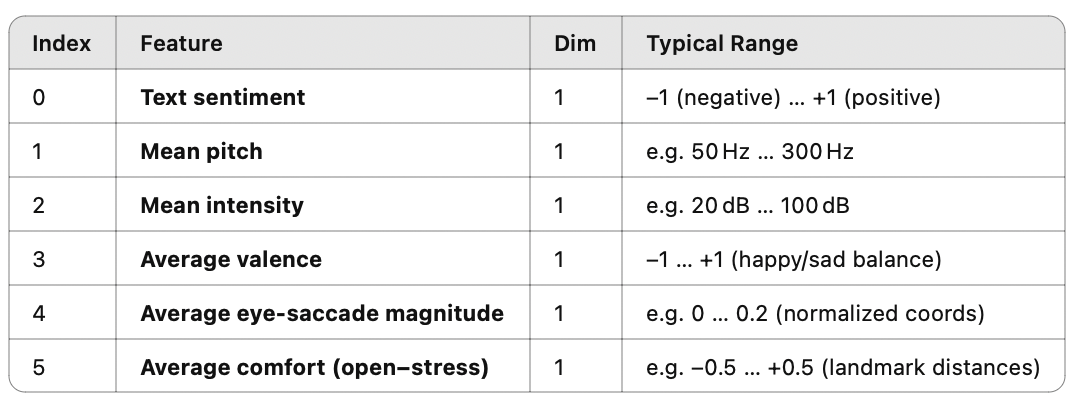

✅ Extracted audio → audio.wav and frames → frames/
Transcript preview: Hello, my name is Sydney Terrain and I am an American from Chicago. ...
Text feature: [0.2]
Audio features [Hz, dB]: [178.64990614  49.80872321]
🔢 Fused feature vector: [ 2.00000000e-01  1.78649906e+02  4.98087232e+01  7.58787879e-02
  2.78418415e-03 -3.02635071e-01]
🧠 GPT Analysis:
 The interpretation of emotional indicators may vary significantly across different cultures. For instance, the text sentiment score of 0.20 might be viewed as neutral or slightly positive in some cultures, while others might perceive it as slightly negative or unenthusiastic. Similarly, a pitch of 178.6 Hz and an intensity of 49.8 dB might be considered normal and comfortable in some cultures, while others might perceive it as too loud or too soft. The interpretation of eye fix var, comfort, and valence might also vary, as some cultures consider direct eye contact a sign of trust and honesty, while others might view it as aggressive or 

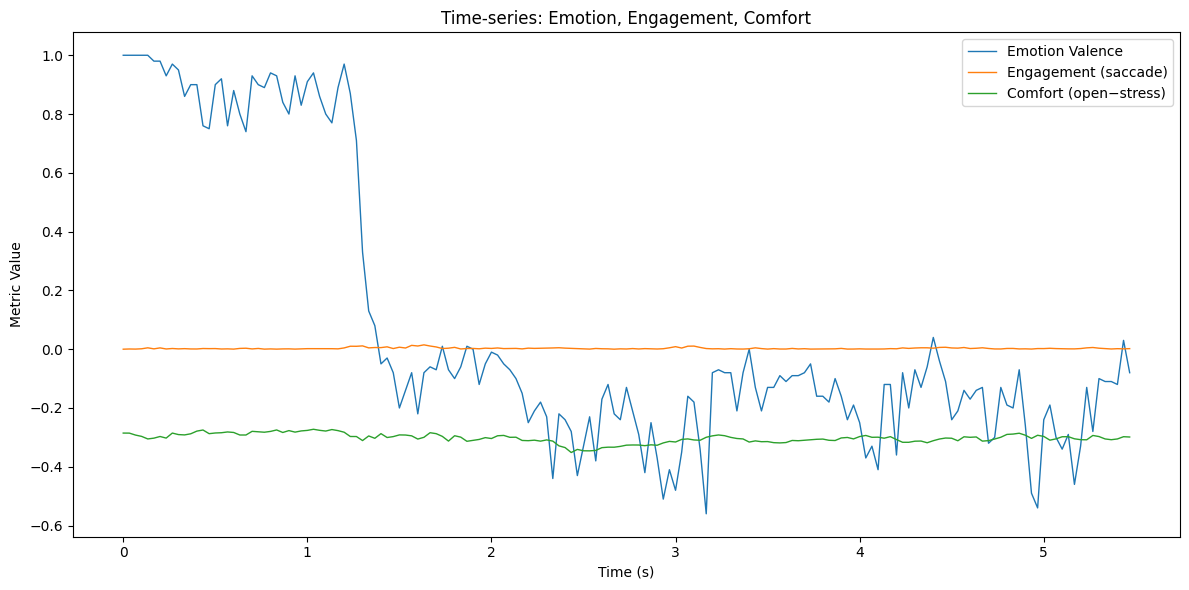

In [ ]:
insight = analyze_video("1.mp4")